# Homework 4 - Model Selection

## Part 1:

In this part you will work with a synthetic spectra and fit regression models in order to find an "optimum complexity" model. You may recycle code from prior lectures in order to achieve this, or use an alternative strategy of your preference.

The dataset below is contained in the file `HW4_data.csv`. This data is similar to the data that might be obtained from a spectrometer, and in this case you can assume that the peaks are Gaussian.

<center>
<img src="data.png" width="600">
</center>

### Problem 1 - 10 points - Complexity and Error Metrics

Implement a strategy to quantify complexity and error for a regression model. Calculate these quantities for a linear regression model and a second-order polynomial model.

In [1]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import pylab as plt
from sklearn.model_selection import cross_val_score


x=[]
y=[]
with open('HW4_data.csv') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        x.append(float(row[1]))
        y.append(float(row[2]))

errorcomplex=[]
def regressionmod(x, y, deg, weight = 1):
    beta = np.polyfit(x,y,deg)
    y_pred = np.polyval(beta,x) #<- this evaluates the polynomial
    error = y-y_pred
    SSE = sum((error)**2)
    SST = sum((y-np.mean(y))**2)
    R2 = (SST - SSE)/SST
    sigma_err = np.std(error)
    mean_err = np.mean(error)
    print('Degree: {}, R2: {}, sigma_error: {}, mean_error: {}'.format(deg, R2, sigma_err,mean_err))
    return 
regressionmod(x,y,1)

regressionmod(x,y,2)

def evaluate_polynomials_CV(x,y,max_poly=2, verbose=True):
    degrees = []
    scores = []
    for degree in range(0,max_poly+1):
        betas = np.polyfit(x,y,degree)
        y_pred = np.polyval(betas,x) #<- this evaluates the polynomial
        errors = y-y_pred
        score = np.mean(np.abs(errors))
        if verbose:
            print('Degree: {}, Score: {}'.format(degree, score))
        degrees.append(degree)
        scores.append(score)
    return degrees, scores
evaluate_polynomials_CV(x,y,2)


Degree: 1, R2: 4.558469230479785e-06, sigma_error: 0.26656349978173594, mean_error: 0.0
Degree: 2, R2: 0.5467440479238144, sigma_error: 0.17946238270187026, mean_error: 9.91991481742997e-16
Degree: 0, Score: 0.22191552563681055
Degree: 1, Score: 0.22192454981933535
Degree: 2, Score: 0.13212697980085386


([0, 1, 2], [0.22191552563681055, 0.22192454981933535, 0.13212697980085386])

### Problem 2 - 20 points - Complexity Optimization

Implement a strategy to arbitrarily increase complexity. Use this strategy along with a regression model to determine the error metric as a function of the complexity metric from 1 to 100 parameter models.

C:\Users\Missj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\Missj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\Missj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\Missj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\Missj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\Missj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\Missj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\Missj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\Missj\Anaconda3\lib\sit

Text(0.5,0,'Complexity Score')

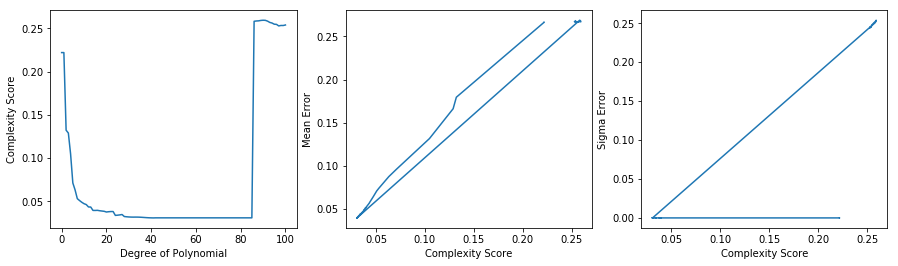

In [2]:
def evaluate_polynomials(x,y,max_poly):
    degree_score_mean_sigma = []
    
    for degree in range(0,max_poly+1):
        betas = np.polyfit(x,y,degree)
        y_pred = np.polyval(betas,x) #<- this evaluates the polynomial
        errors = y-y_pred
        score = np.mean(np.abs(errors))
        sigma_err = np.std(errors)
        mean_err = np.mean(errors)
        degree_score_mean_sigma.append([degree, score,sigma_err, mean_err])
    return degree_score_mean_sigma
d_s_m_si = evaluate_polynomials(x,y,max_poly=100)
d, s, m, si = zip(*d_s_m_si)
fig, axes = plt.subplots(1,3,figsize=(15,4))
axes[0].plot(d,s)
axes[0].set_ylabel('Complexity Score')
axes[0].set_xlabel('Degree of Polynomial')
axes[1].plot(s,m)
axes[1].set_ylabel('Mean Error')
axes[1].set_xlabel('Complexity Score')
axes[2].plot(s,si)
axes[2].set_ylabel('Sigma Error')
axes[2].set_xlabel('Complexity Score')



### Problem 3 - 20 points - Refinement and Interpretation

Utilize and/or refine the complexity/error metrics and regression model in order to determine:

1) The number of peaks in the spectra
2) The locations of peaks in the spectra
3) The area of the peaks in the spectra

Note: There is a right answer here since this is synthetic data, but you won't be graded on whether or not you get it right. As long as you illustrate a reasonable approach it is sufficient.

41
0.0306930867955
I am assuming 40 parameters should be used
(array([  0,  19, 123, 478, 885, 959, 994], dtype=int64),)


C:\Users\Missj\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


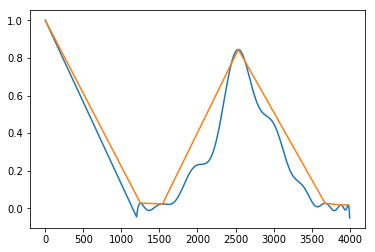

[[  0.00000000e+00   9.99999702e-01]
 [  1.25045045e+03   2.79722824e-02]
 [  1.54194194e+03   2.42554052e-02]
 [  2.53693694e+03   8.44759486e-01]
 [  3.67767768e+03   2.72199687e-02]
 [  3.88508509e+03   1.80713023e-02]
 [  3.98318318e+03   1.86633398e-02]]
7
There are seven extrema

0.0
[0.56875011706641376, 0.74747603126407014, 105.66879817743036, 141.52722096725546, 0.43147233285956321, 0.15400784959146457]


In [3]:
from scipy.signal import argrelextrema

minsiger=np.min(s)
locmin=np.argmin(s)
degmin=d[locmin]
print(degmin)
print(minsiger)
print('I am assuming 40 parameters should be used')

y=np.transpose(y)
x=np.transpose(x)
coef=np.polyfit(x,y,degmin) 
ypred=np.polyval(coef, x)
plt.plot(x,ypred)
xydata=np.column_stack((x,ypred))

peaks = argrelextrema(ypred, np.greater_equal)
print(peaks)
peaksx = x[peaks]
peaksy = ypred[peaks]
plt.plot(peaksx,peaksy)
plt.show()
extrema = np.column_stack((peaksx,peaksy))
print(extrema)
print(len(extrema))
print('There are seven extrema')
areas=[]
print()
    
for xi in range(0, len(x)):
    ypredarea=[]
    if x[xi]<peaksx[0]:
        ypredarea.append(ypred[xi])
    else:
        pass
area1=np.trapz(ypredarea, dx=1)

print(area1)

for i in range(0,len(extrema)-1):
    ypredarea=[]
    for xi in range(0, len(x)):
        if x[xi]<peaksx[i+1] and x[xi]>=peaksx[i]:
            ypredarea.append(ypred[xi])
        else:
            pass
    area=np.trapz(ypredarea, dx=1)
    areas.append(area)
print(areas)

## Part 2:

In this part you will work with the MNIST dataset of hand-written digits. You will utilize kernel-based classification algorithms to classify the data, and will tune hyper-parameters using cross-validation. You may recycle code from the lectures to achieve this goal.

You should use at least 1500 MNIST images, but may use more if you would like.

### Problem 4 - 10 points - Feature selection

Load in the MNIST dataset and decide on feature vectors to represent the data. You should quantitatively justify the choice of feature vector in some way. For example, describe how much variance your feature set captures.

Utilizing PCA approximately 40 feature vectors are required to explain 80 percent of the variance


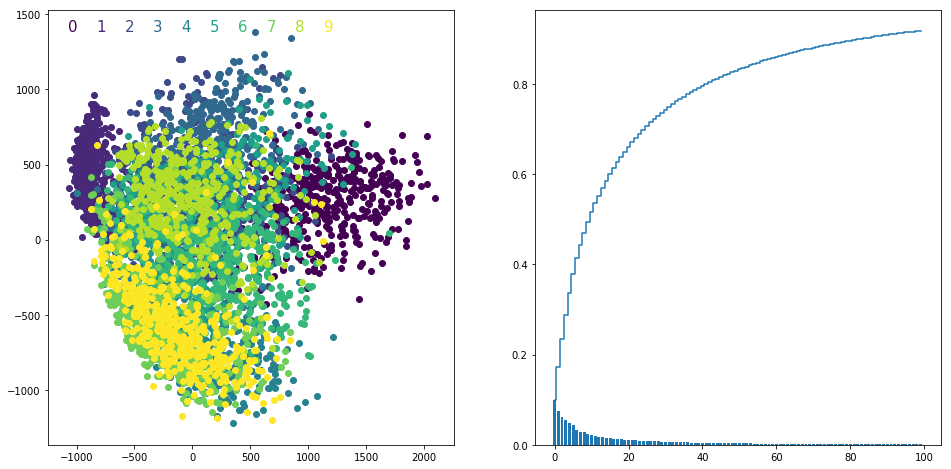

In [4]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import pylab as plt
from mnist import MNIST
from sklearn.decomposition import PCA
mndata = MNIST('./mnist')
images, labels = mndata.load_training()
images = np.array(images)
images_subset = images[:5000,:] #<- take the first 1000 images
images_subset.shape
pca = PCA(.99)

data = pca.fit_transform(images_subset)
fig, axes = plt.subplots(1,2, figsize=(16,8))
pca_df = pd.DataFrame(data)
pca_df['label'] = labels[:5000]
colors = [plt.cm.viridis((i/9)) for i in range(10)]

xpos = 0.05
for label in range(0,10):
    idxs = np.array(pca_df['label'] == label)
    c = colors[label]
    axes[0].scatter(data[idxs,0], data[idxs,1], color=c)
    axes[0].annotate(str(label), xy=[xpos, 0.95], xycoords='axes fraction', color=c, size=15)
    xpos += 0.07

axes[1].bar(range(100), pca.explained_variance_ratio_[:100])
axes[1].step(range(100), np.cumsum(pca.explained_variance_ratio_[:100]),where='mid')
print('Utilizing PCA approximately 40 feature vectors are required to explain 80 percent of the variance')

C:\Users\Missj\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


(5000, 169)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

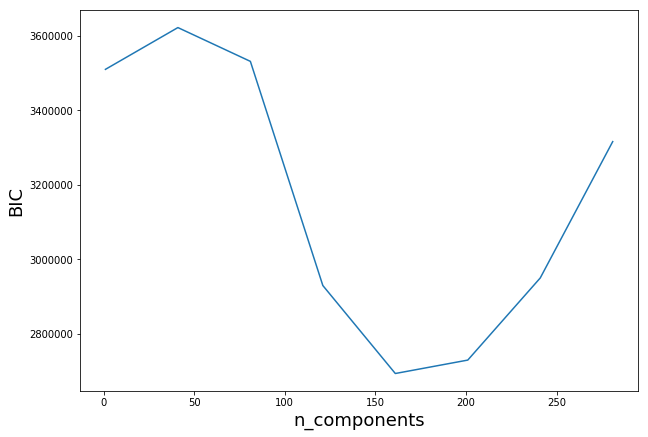

In [12]:
from scipy.ndimage import zoom
from sklearn.mixture import GaussianMixture

def reduce_image_resolution(img_vector, factor):
    N = int(np.sqrt(len(img_vector)))
    img = img_vector.reshape(N,N)
    new_img = zoom(img,1./factor)
    return new_img.ravel()

reduced_images = images_subset.copy()
factor = 2.2

new_images = []
for img in reduced_images:
    new_images.append(reduce_image_resolution(img, factor))
    
reduced_images = np.array(new_images)
print(reduced_images.shape)

data2 = pca.fit_transform(reduced_images)
data2.shape

n_components = np.arange(1, 300, 40)
models = [GaussianMixture(n, covariance_type='full').fit(data2)
          for n in n_components]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(n_components, [m.bic(data2) for m in models], label='BIC')
ax.set_xlabel('n_components', size=18);
ax.set_ylabel('BIC', size=18);



### Problem 5 - 20 points - Kernel-based classification

Use a kernel-based classification model to classify the digits from 1-10. Hold out at least 30$\%$ of the original data as a validation set, and report the confusion matrix for the validation set.

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.43      0.60        88
          1       1.00      0.52      0.68        91
          2       1.00      0.31      0.48        86
          3       1.00      0.38      0.56        91
          4       1.00      0.29      0.45        92
          5       0.14      1.00      0.24        91
          6       1.00      0.36      0.53        91
          7       1.00      0.28      0.44        89
          8       1.00      0.07      0.13        88
          9       1.00      0.10      0.18        92

avg / total       0.91      0.38      0.43       899


Confusion matrix:
[[38  0  0  0  0 50  0  0  0  0]
 [ 0 47  0  0  0 44  0  0  0  0]
 [ 0  0

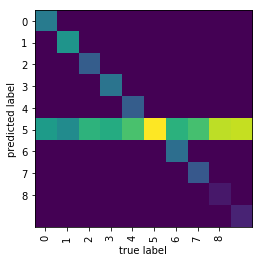

In [10]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_mldata
from sklearn.metrics import confusion_matrix
digits = datasets.load_digits()
labels=digits.target
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))



classifier = SVC(kernel='rbf', class_weight='balanced')

classifier.fit(data[:n_samples // 2], labels[:n_samples // 2])

expected = labels[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
fig, ax = plt.subplots()
mat = confusion_matrix(expected, predicted)
ax.imshow(mat.T)
ax.set_xticks(range(0,9))
ax.set_xticklabels(digits.target, rotation=90)
ax.set_yticks(range(0,9))
ax.set_yticklabels(digits.target)

ax.set_xlabel('true label')
ax.set_ylabel('predicted label');

plt.show()


### Problem 6 - 20 points - Hyperparameter tuning

Use grid-based cross-validation to determine at least 2 hyperparameters of your kernel-based classifier. Report the parameters of the best model, and the confusion matrix of the best model on the validation set.

{'svc__C': 100, 'svc__gamma': 1e-06}


Text(0,0.5,'predicted label')

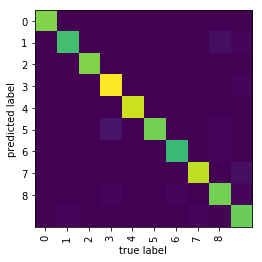

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

pca = PCA(n_components=60)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Xtrain, Xtest, ytrain, ytest = train_test_split(data[:n_samples], labels[:n_samples])

param_grid = {'svc__C': [1, 5, 10, 50, 100],
              'svc__gamma': [1e-12, 1e-10, 1e-8, 1e-6]}#, 1e-4, 1e-2]}
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)
model = grid.best_estimator_

yfit = model.predict(Xtest)
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots()
mat = confusion_matrix(ytest, yfit)
ax.imshow(mat.T)
ax.set_xticks(range(0,9))
ax.set_xticklabels(digits.target, rotation=90)
ax.set_yticks(range(0,9))
ax.set_yticklabels(digits.target)

ax.set_xlabel('true label')
ax.set_ylabel('predicted label')
